In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("FuelConsumption.csv")
# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']] 
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


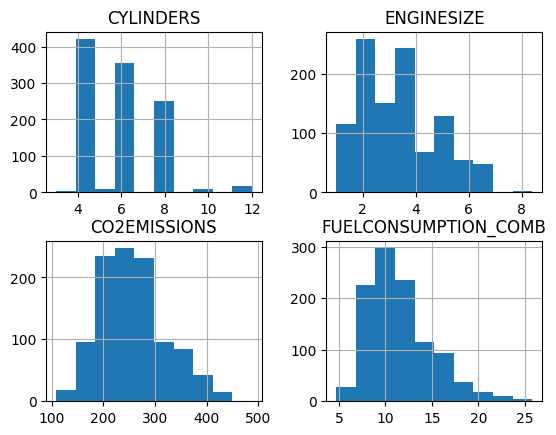

In [5]:
data1 = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']] 
data1.hist()
plt.show()

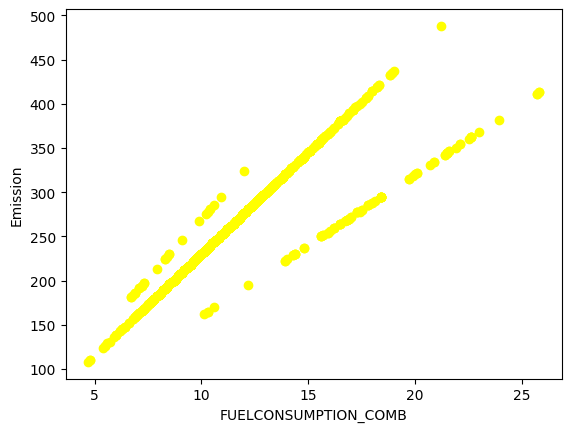

In [14]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='yellow') 
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

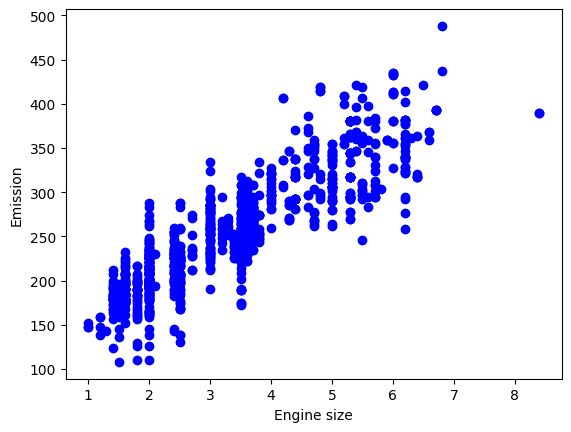

In [7]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

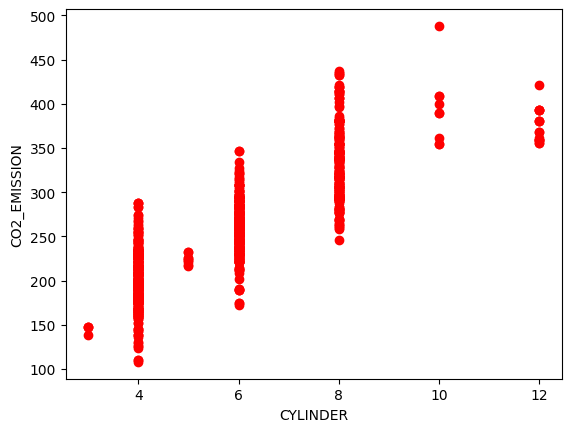

In [13]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS, color='red')
plt.xlabel('CYLINDER')
plt.ylabel('CO2_EMISSION')
plt.show()

In [8]:
msk = np.random.rand(len(df))<0.8
train = cdf[msk]
test = cdf[~msk]

In [9]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.array(train[['ENGINESIZE']])
train_y = np.array(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.6060663]]
Intercept:  [127.12287867]


Text(0, 0.5, 'Emission')

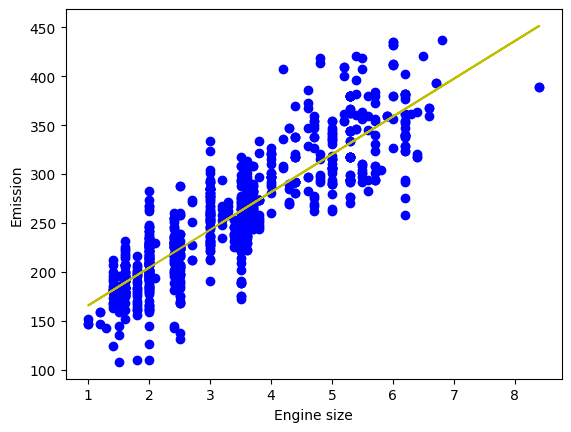

In [10]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue') 
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0],'-y') 
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [11]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f"% np.mean(np.absolute(test_y_hat - test_y))) 
print("Residual sum of squares (MSE): %.2f"% np.mean((test_y_hat - test_y)**2)) 
print("R2-score: %.2f"% r2_score(test_y_hat , test_y))


Mean absolute error: 22.19
Residual sum of squares (MSE): 937.20
R2-score: 0.66


In [16]:
train_x = np.array(train[['FUELCONSUMPTION_COMB']])
train_y = np.array(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[16.07383121]]
Intercept:  [70.52723041]


Text(0, 0.5, 'Emission')

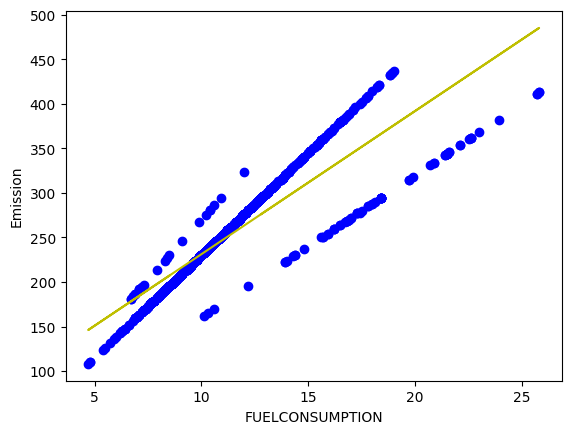

In [19]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS, color='blue') 
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0],'-y') 
plt.xlabel("FUELCONSUMPTION")
plt.ylabel("Emission")

In [20]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f"% np.mean(np.absolute(test_y_hat - test_y))) 
print("Residual sum of squares (MSE): %.2f"% np.mean((test_y_hat - test_y)**2)) 
print("R2-score: %.2f"% r2_score(test_y_hat , test_y))

Mean absolute error: 20.57
Residual sum of squares (MSE): 844.98
R2-score: 0.72


In [21]:
train_x = np.array(train[['CYLINDERS']])
train_y = np.array(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[29.76957394]]
Intercept:  [83.90869469]


Text(0, 0.5, 'Emission')

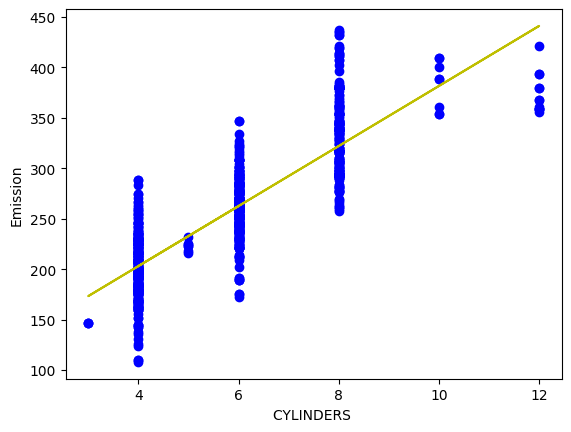

In [22]:
plt.scatter(train.CYLINDERS, train.CO2EMISSIONS, color='blue') 
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0],'-y') 
plt.xlabel("CYLINDERS ")
plt.ylabel("Emission")

In [23]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['CYLINDERS']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f"% np.mean(np.absolute(test_y_hat - test_y))) 
print("Residual sum of squares (MSE): %.2f"% np.mean((test_y_hat - test_y)**2)) 
print("R2-score: %.2f"% r2_score(test_y_hat , test_y))

Mean absolute error: 24.44
Residual sum of squares (MSE): 1055.88
R2-score: 0.63
